In [1]:
!pwd

/Users/kpadhikari/Desktop/BigFls/CLAS12/GitProj/KPAdhikari/PythonStuff/IPython_Jupyter_Notebooks


This is second notebook that I intend to carry stuff related to plotting using matplotlib. The first notebook is http://localhost:8888/notebooks/GitProj/KPAdhikari/PythonStuff/IPython_Jupyter_Notebooks/Python%20Plotting%20-%20matplotlib%2C%20(numpy%20too)%20etc.ipynb#PassingPlotsToFunctionsEtc

<a id='GoTop'></a>
## Contents
* [Plot_Organization_in_matplotlib](#Plot_Organization_in_matplotlib)

[GoTop](#GoTop) <a id='Plot_Organization_in_matplotlib'></a>
### [Plot Organization in matplotlib — Your One-stop Guide](https://towardsdatascience.com/plot-organization-in-matplotlib-your-one-stop-guide-if-you-are-reading-this-it-is-probably-f79c2dcbc801)
Matias Calderini Oct 27, 2019·9 min read

If you are reading this, it is probably because you agree with me that most matplotlib tutorials out there are missing a crucial aspect of plotting and data visualization.

While there might be thousands of tutorials on how to change line thickness or the size of your titles, they all seem to forget that organization of subplots plays a huge role in conveying the story your data is telling. Sometimes you might want to emphasize the importance of a plot by making it bigger, or complement a plot by adding another one as an inset on top of it.

To do those edits, I have seen (too) many people save individual plots done with Python and later re-arrange it all together on some other image editing software. Not only is this inefficient, it is not scalable to high volume plotting or to plots that you need to tweak and/or redo multiple times.

For all those friends and for all of you out there still struggling with such problems, here is your one-stop guide on how to organize your plots and subplots using only matplotlib on Python.

A picture is worth a thousand words, so for those that want a quick preview, those that are re-reading this, or those whith TLDR syndrome, here is a sample code for what we will accomplish in this tutorial:

Note: *(**TLDR ==Too long; didn't read (abbreviated TL;DR and tl;dr)** is a shorthand notation added by an editor indicating that a passage appears too long to invest the time to digest it.)*

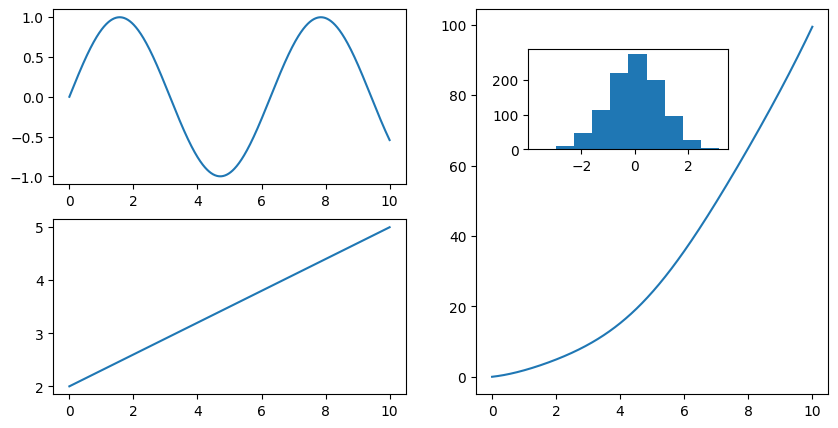

In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

time = np.linspace(0, 10, 1000)
height = np.sin(time)
weight = time*0.3 + 2
score = time**2 + height
distribution = np.random.normal(0, 1, len(time))

fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=2, ncols=2)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(time, height)

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(time, weight)

ax2 = fig.add_subplot(gs[:, 1])
ax2.plot(time, score)

ax3 = fig.add_axes([0.6, 0.6, 0.2, 0.2])
ax3.hist(distribution)

plt.show()

And here is a schematic of how we will approach the issue of subplot organization:

<img src="images/image4_plotOrganizationExplantion.png" width=600 height=600 />
Fig. Schematic of subplot organization elements

If that piqued your interest or if you are back to review what you read before, welcome to the comprehensive beginner tutorial on organizing your plots in Python using matplotlib!

The way we will approach the issue of organization is by clarifying the distinction between figures, subplots and axes, and how we can optimize it with matplotlib’s gridSpec. Without further ado, let’s start with the first and most basic one.

### Figure — Your Frame

The most basic element of a matplotlib plot is the figure. The figure object should be considered as your frame. Imagine any visualization as a potential collage of graphs and the figure as the place where all those graphs are pasted and moved around.

Just like a picture frame though, the figure by itself is an empty structure waiting for content. This is the first element of our initial schematic:
<img src="images/image4_FigureOrFrameExplaining.png" width=600 height=600 />
Schematic — Figure

In *matplotlib*, we create the figure object when using the line *fig = plt.figure()*. We can also omit to put `fig `= . This is simply so we store the figure object in some variable in case we needed to use it later. For example, if you wanted to save the figure as an image with `fig.save()`. If you were to save the newly created figure, you’ll see your beautiful newly created blank image.

In [6]:
fig = plt.figure()
fig.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


In [9]:
fig = plt.figure()
plt.show()

<Figure size 640x480 with 0 Axes>

If all you wanted was to plot a single graph, then you wouldn’t need to think about axes or subplots. You could simply do it like this:

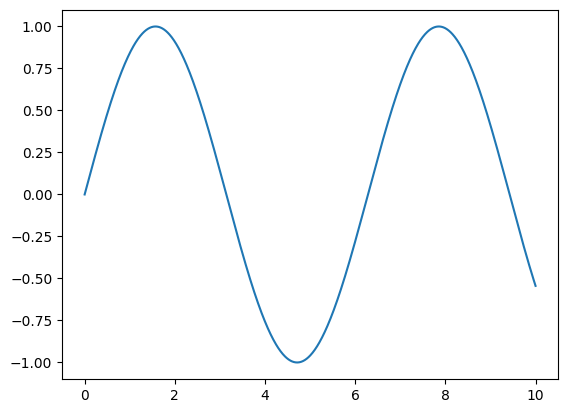

In [12]:
# Synthetic Data
time = np.linspace(0, 10, 1000)
height = np.sin(time)

# Plotting on a figure
fig = plt.figure()
plt.plot(time, height)
fig.savefig('images/junkMadeByCode.png')
plt.show()

We can deconstruct the previous block of code:
* `plt.figure()` creates a figure object
* `plt.plot(time, height)` will take the available space and draw the relationship between time (x-axis) and height (y-axis)
* `plt.show()` will simply render the plot. This is not necessary in notebooks, but it is good practice in case you are coding on a text editor or a less interactive editor than the one we use here.

If you had more data, you could add more lines to this simple plot. But what if we wanted to plot a second variable, on a different plot? That’s where the axes and subplots become useful.

### Axes — The plotting canvas

**While the figure object was your plotting frame, the canvas on which you will be drawing is the axes object. By themselves, axes are free-floating,** meaning that they can be put in any position on the figure. We can add them to our orignal schematic:

<img src="images/image4_axesExplaining.png" width=600 height=600 />
Schematic — Axes

In code, this is simply done like this:


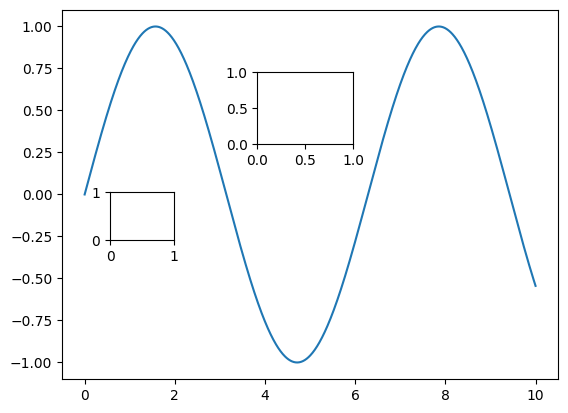

In [13]:
# Original plot
fig = plt.figure()
plt.plot(time, height)

# Adding new empty axes
fig.add_axes([0.43, 0.6, 0.15, 0.15])  #[lowerCorner_x, lowerCorner_y, width, height]
fig.add_axes([0.2, 0.4, 0.1, 0.1])     #[lowerCorner_x, lowerCorner_y, width, height]

#fig.savefig('figures/figureAxes')
plt.show()

Here we see that the `add_axes([left, bottom, width, height])` function added two new plotting areas onto the original plot. The specific position and size of the new axes are specified in the respective input arrays of the functions.

However, adding empty axes doesn’t serve much purpose, so let’s see how to use them to plot:

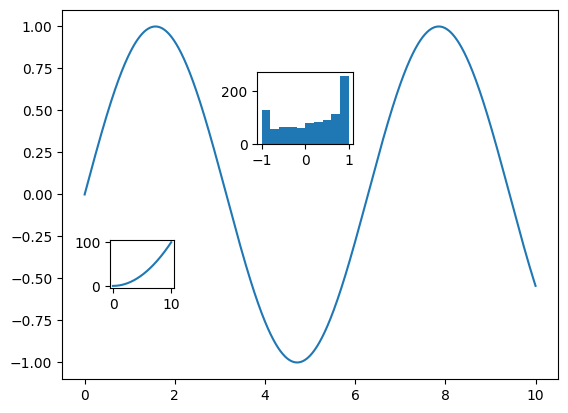

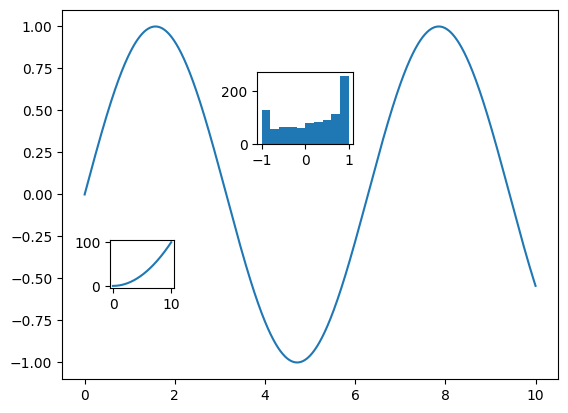

In [15]:
# Original plot
fig = plt.figure()
plt.plot(time, height)

# First new axes
ax1 = fig.add_axes([0.43, 0.6, 0.15, 0.15])
ax1.hist(height)

# Second new axes
ax2 = fig.add_axes([0.2, 0.3, 0.1, 0.1])
ax2.plot(time, time**2)

#fig.savefig('images/figureAxes2.png')
plt.show()